# Лабораторная работа 2

In [334]:
import os
import matplotlib.pyplot as plt

In [335]:
import numpy as np
from imageio import imread, imsave

In [336]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename != '.DS_Store':
            print(os.path.join(folder, filename))
            img = imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

In [337]:
folder_path = "./data/"
images = load_images_from_folder(folder_path)

./data/sample6.jpg
./data/sample1.jpg


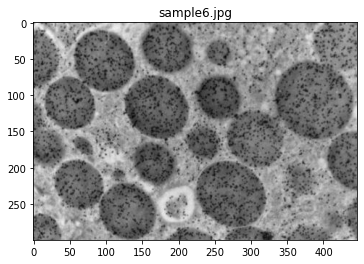

In [338]:
plt.imshow(images[0], cmap='gray')
plt.title('sample6.jpg')
plt.show()

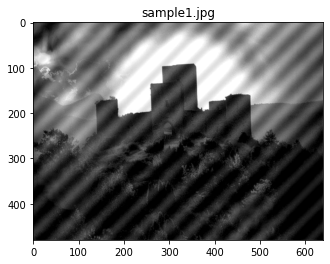

In [339]:
plt.imshow(images[1], cmap='gray')
plt.title('sample1.jpg')
plt.show()

## Картинка 1. Клетки и кусочек кальмара. Все в точечках.

In [340]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = images[0]
image_f = np.fft.fft2(image)
fshift = np.fft.fftshift(image_f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

### Применим Гауссовский фильтр для того, чтобы избавиться от шума

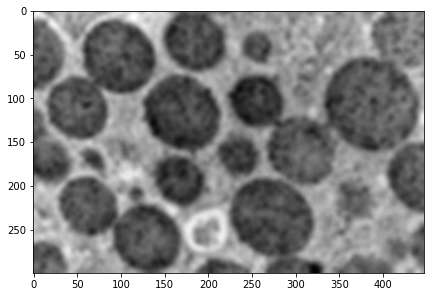

In [341]:
image_blurred = cv2.GaussianBlur(image, (9, 9), 3)
plt.figure(figsize=(7, 10))
plt.imshow(image_blurred, cmap='gray')

### Применим разложение Фурье для того, чтобы избавиться от шума

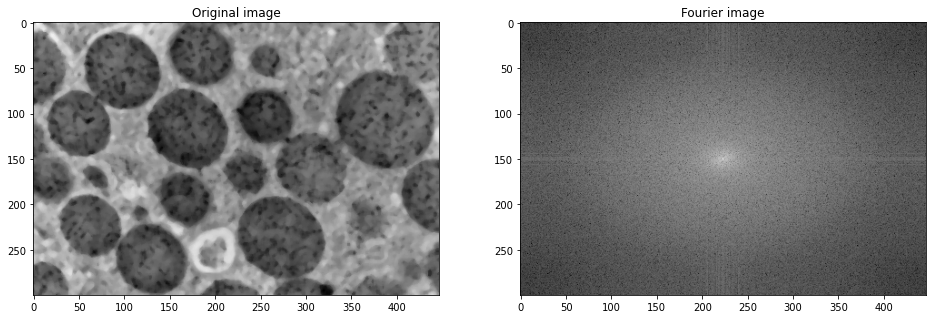

In [342]:
fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(cv2.medianBlur(image, 5), cmap='gray')
ax[1].set_title("Fourier image")
ax[1].imshow(magnitude_spectrum, cmap='gray')

In [343]:
image.shape

(300, 447)

In [344]:
# suppress black dots
# create Hamming window
r = 50 
ham = np.hamming(image.shape[1])[:,None]
ham2d = np.sqrt(np.dot(ham, ham.T)) ** r
ham2d = ham2d[73:-74]

# create FFT
f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = ham2d * f_complex

# apply window on FFT
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.abs(np.fft.ifft2(f_filtered_shifted))

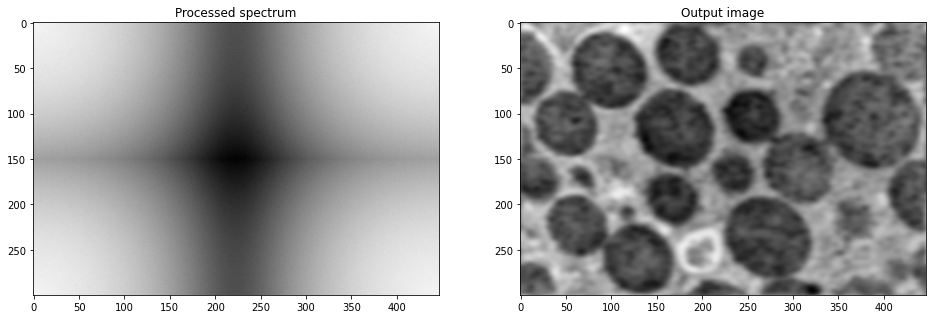

In [345]:
fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.ravel()
ax[0].set_title("Processed spectrum")
ax[0].imshow(np.log(np.abs(f_filtered_shifted)), cmap='gray')
ax[1].set_title("Output image")
ax[1].imshow(inv_img, cmap='gray')

In [346]:
inv_img -= inv_img.min()
inv_img = inv_img*255 / inv_img.max()
inv_img = inv_img.astype(np.uint8)
imsave('./sample_6_proceeded.jpg', inv_img)

## Картинка 2. Замок и полоски. 

In [347]:
image = images[1]
image_f = np.fft.fft2(image)
fshift = np.fft.fftshift(image_f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

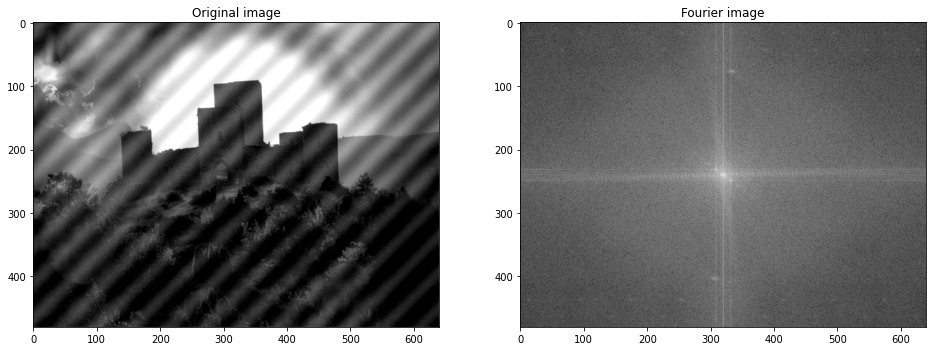

In [348]:
fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Fourier image")
ax[1].imshow(magnitude_spectrum, cmap='gray')

In [349]:
r = image_f.shape[0]//2        # number of rows/2
c = image_f.shape[1]//2        # number of columns/2 
print(f'Center coordinates: ({r}, {c}).')

p = 11
n = 8

Center coordinates: (240, 320).


In [350]:
fshift2 = np.copy(fshift)

In [351]:
coeff = 1e-10
# color vertical lines
fshift2[:, c-p] = coeff
fshift2[:, c+p] = coeff

fshift2[:r-n, c] = coeff
fshift2[r+n:, c] = coeff

# color horizonatal lines
fshift2[r-n-1:r-n+1, :] = coeff
fshift2[r+n:r+n+2, :] = coeff

# color white points
coord_h = 75
coord_x_r = c + n
coord_x_l = c - n
fshift2[coord_h-1:coord_h+3, coord_x_r:coord_x_r+6] = coeff
fshift2[-(coord_h+3):-(coord_h-1), coord_x_l-5:coord_x_l+1] = coeff

# calculate new spectrum
mag_spec = 20*np.log(np.abs(fshift2))
inv_fshift = np.fft.ifftshift(fshift2)

# reconstruct image
img_recon = np.real(np.fft.ifft2(inv_fshift))

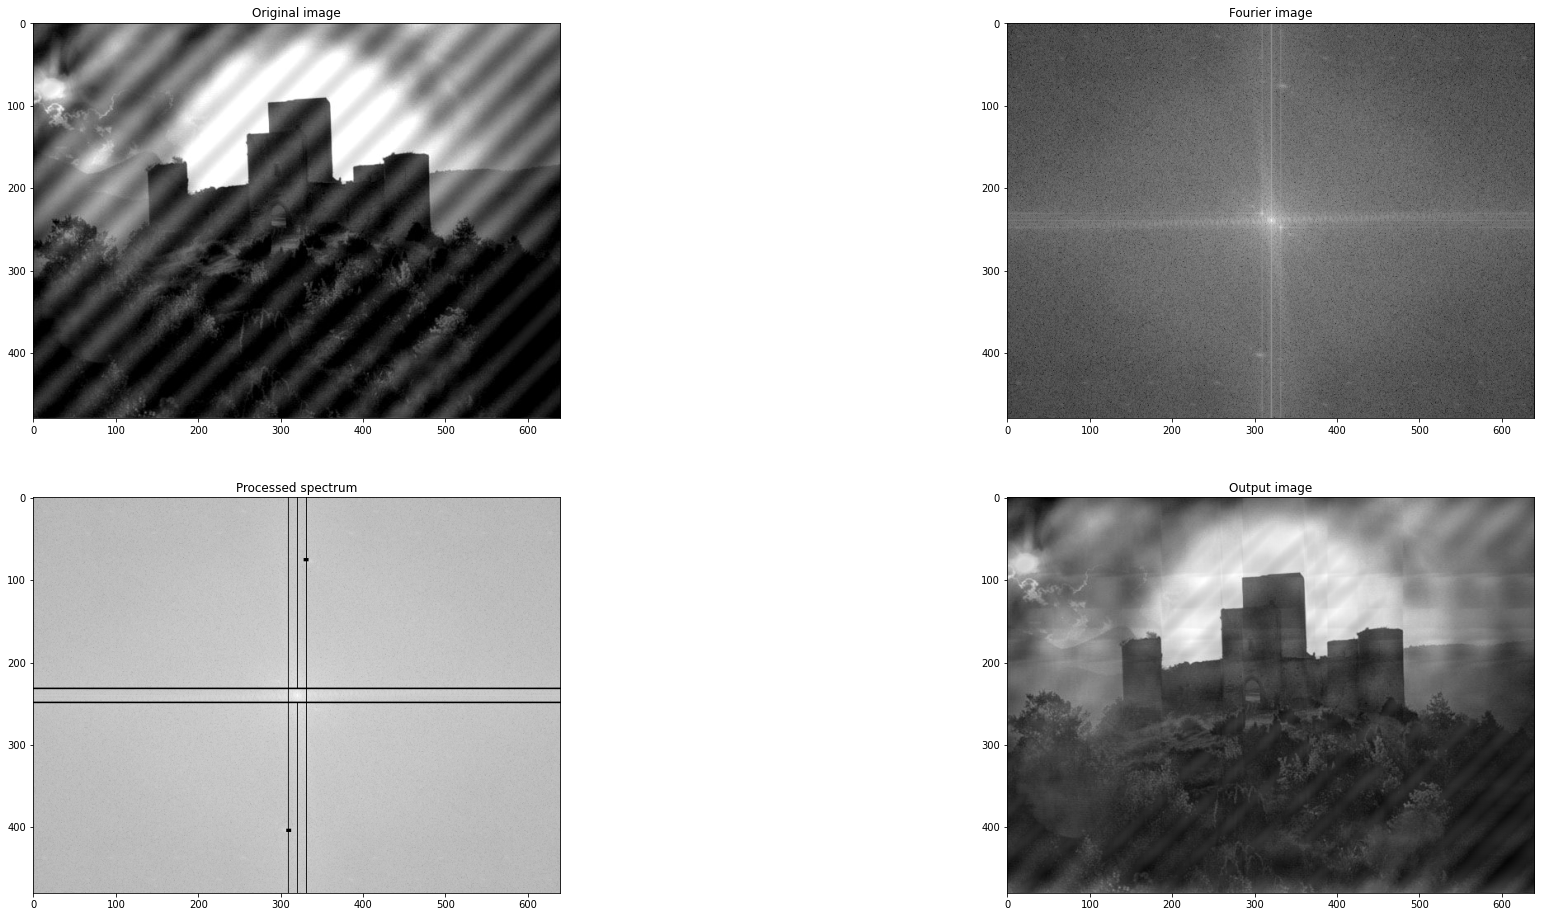

In [352]:
fig, axes = plt.subplots(2, 2, figsize=(32, 16))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Fourier image")
ax[1].imshow(magnitude_spectrum, cmap='gray')
ax[2].set_title("Processed spectrum")
ax[2].imshow(mag_spec, cmap='gray')
ax[3].set_title("Output image")
ax[3].imshow(img_recon, cmap='gray')

In [353]:
img_recon -= img_recon.min()
img_recon = img_recon*255 / img_recon.max()
img_recon = img_recon.astype(np.uint8)
imsave('./sample_1_proceeded.jpg', img_recon)